In [119]:
%reset
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from random import random
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models.sources import ColumnDataSource
from bokeh.models.callbacks import CustomJS
from bokeh.layouts import gridplot

output_notebook()


sns.set(font_scale=2,style='whitegrid') 
pd.set_option('max_colwidth',100)

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


Loading BokehJS ...

In [120]:
datapath = 'python_approach_qc/'
files = os.listdir(datapath)
files_pos = [f for f in files if f.endswith('posvars_approach.csv')]
files_lfp = [f for f in files if f.endswith('lfpvars_approach.csv')]

In [126]:
#iterate over the lfp files, and within the loop
#grab the relevant position file
gather_inds = []
for file in files_lfp[:4]:

    lfpfile = pd.read_csv(os.path.join(datapath,file))
    
    block_trials = lfpfile.groupby(['odor_block_labels_lfplen','trial_labels_lfplen']).count().index

    for block_trial in block_trials:
        
        odorblock = block_trial[0]
        trial = block_trial[1] 
        
        subtrial = lfpfile[(lfpfile['trial_labels_lfplen']==trial) & (lfpfile['odor_block_labels_lfplen']==odorblock)]

        lfp = subtrial['lfp_approach'].values
        lfptime = subtrial['time'].values

        #find the corresponding position file
        posfilename = file.split('TET')[0] + 'posvars_approach.csv'
        posfile = pd.read_csv(os.path.join(datapath,posfilename))

        subtrialpos = posfile[(posfile['trial_labels_poslen']==trial) & (posfile['odor_block_labels_poslen']==odorblock)]
        vsm = subtrialpos['vsm'].values
        postime = subtrialpos['vposts'].values
        
        
        
        #print out and interact with the data
        s1 = ColumnDataSource(data=dict(x=lfptime, y=lfp))
        s2 = ColumnDataSource(data=dict(x=postime, y=vsm))


        p1 = figure(plot_width=900, plot_height=200,tools=['box_select', 'pan', 'lasso_select','zoom_out','box_zoom', 'reset'])
        p2 = figure(plot_width=900, plot_height=200,tools=['box_select', 'pan', 'lasso_select','zoom_out','box_zoom', 'reset'])


        #the callback code only works with circle/scatter glyphs 
        #for some reason, but it's hard to just see the lfp in 
        #scatter format, so I've combined both the line plot for
        #user visibility and the scatter/circle glyphs for selection
        p1.line("x", "y", source=s1, alpha=0.6)
        p1.circle("x", "y", source=s1, fill_color='white', size=4) 


        p2.line("x", "y", source=s2, alpha=0.6)


        # make a custom javascript callback that exports the indices of the selected points to the Jupyter notebook
        callback = CustomJS(args=dict(s=s1), 
                            code="""
                                 console.log('Running CustomJS callback now.');
                                 var indices = s.selected.indices;
                                 var kernel = IPython.notebook.kernel;
                                 kernel.execute("selected_indices = " + indices)
                                 """)
        

        # set the callback to run when a selection geometry event occurs in the figure
        p1.js_on_event('selectiongeometry', callback)


        # Link the x range between the two subplots
        p1.x_range = p2.x_range

        layout = gridplot([[p1], [p2]])

        show(layout)
        
        input('press any key to continue')
        
        plt.close()
        
        # inspect the selected indices
        gather_inds.append([selected_indices[0],selected_indices[1]])
        


        

press any key to continue


press any key to continue


press any key to continue


press any key to continue


press any key to continue


press any key to continue


KeyboardInterrupt: 

In [127]:
gather_inds

[[27453, 27454],
 [27453, 27454],
 [27453, 27454],
 [27453, 27454],
 [27453, 27454],
 [27453, 27454]]

The below doesn't work because the `kernel` JS variable can't get populated until the whole cell is run, which results in `selected_indices`just not getting defined at all. 

In [118]:
#iterate over the lfp files, and within the loop
#grab the relevant position file

for file in files_lfp:

    lfpfile = pd.read_csv(os.path.join(datapath,file))
    
    block_trials = lfpfile.groupby(['odor_block_labels_lfplen','trial_labels_lfplen']).count().index

    for block_trial in block_trials:
        
        odorblock = block_trial[0]
        trial = block_trial[1] 
        
        subtrial = lfpfile[(lfpfile['trial_labels_lfplen']==trial) & (lfpfile['odor_block_labels_lfplen']==odorblock)]

        lfp = subtrial['lfp_approach'].values
        lfptime = subtrial['time'].values

        #find the corresponding position file
        posfilename = file.split('TET')[0] + 'posvars_approach.csv'
        posfile = pd.read_csv(os.path.join(datapath,posfilename))

        subtrialpos = posfile[(posfile['trial_labels_poslen']==trial) & (posfile['odor_block_labels_poslen']==odorblock)]
        vsm = subtrialpos['vsm'].values
        postime = subtrialpos['vposts'].values
        
        
        
        #print out and interact with the data
        s1 = ColumnDataSource(data=dict(x=lfptime, y=lfp))
        s2 = ColumnDataSource(data=dict(x=postime, y=vsm))


        p1 = figure(plot_width=900, plot_height=200,tools=['box_select', 'pan', 'lasso_select','zoom_out','box_zoom', 'reset'])
        p2 = figure(plot_width=900, plot_height=200,tools=['box_select', 'pan', 'lasso_select','zoom_out','box_zoom', 'reset'])


        #the callback code only works with circle/scatter glyphs 
        #for some reason, but it's hard to just see the lfp in 
        #scatter format, so I've combined both the line plot for
        #user visibility and the scatter/circle glyphs for selection
        p1.line("x", "y", source=s1, alpha=0.6)
        p1.circle("x", "y", source=s1, fill_color='white', size=4) 


        p2.line("x", "y", source=s2, alpha=0.6)


        # make a custom javascript callback that exports the indices of the selected points to the Jupyter notebook
        callback = CustomJS(args=dict(s=s1), 
                            code="""
                                 console.log('Running CustomJS callback now.');
                                 var indices = s.selected.indices;
                                 var kernel = IPython.notebook.kernel;
                                 kernel.execute("selected_indices = " + indices)
                                 """)
        

        # set the callback to run when a selection geometry event occurs in the figure
        p1.js_on_event('selectiongeometry', callback)


        # Link the x range between the two subplots
        p1.x_range = p2.x_range

        layout = gridplot([[p1], [p2]])

        show(layout)
        
        input("Press any key to continue")


        # inspect the selected indices
        selected_indices

        # use the indices to create lists of the selected values
        x_selected, y_selected = [], []
        for indice in selected_indices:
            x_val = s1.data['x'][indice]
            y_val = s1.data['y'][indice]
            x_selected.append(x_val)
            y_selected.append(y_val)

        # make a column data souce containing the selected values
        selected = ColumnDataSource(data=dict(x=x_selected, y=y_selected))

        # inspect the selected data
        # selected.data

        new_st = selected.data['x'][0]
        new_ed = selected.data['x'][-1]

        print(new_st,new_ed)

        window_dur = selected.data['x'][-1]-selected.data['x'][0]
        print('window dur: ',window_dur)

        target_winsize = 1.5
        while window_dur > target_winsize: 

            #trim the window down to size
            excess = window_dur - target_winsize
            trim = excess/2

            new_st = new_st+trim
            new_ed = new_ed-trim

            window_dur = new_ed - new_st

            print(window_dur, new_ed, new_st)

        new_lfp = lfp[(lfptime>=new_st) & (lfptime<=new_ed)]
        new_lfptime = lfptime[(lfptime>=new_st) & (lfptime<=new_ed)]
        new_vsm = vsm[(postime>=new_st) & (postime<=new_ed)]
        new_postime = postime[(postime>=new_st) & (postime<=new_ed)]

        fig,ax = plt.subplots(2,1,figsize=(20,6))

        ax[0].plot(new_lfptime,new_lfp,color='k',alpha=0.5)

        ax[1].plot(new_postime,new_vsm,color='k',alpha=0.5)
        ax[1].set_ylim(0,)

        for a in ax: 
            a.set_xlim(new_st,new_ed)

        fig.tight_layout()
        plt.show()

        input("Press any key to continue")
        
        plt.close()



Press any key to continue


NameError: name 'selected_indices' is not defined

In [117]:
callback.

TypeError: 'CustomJS' object is not subscriptable

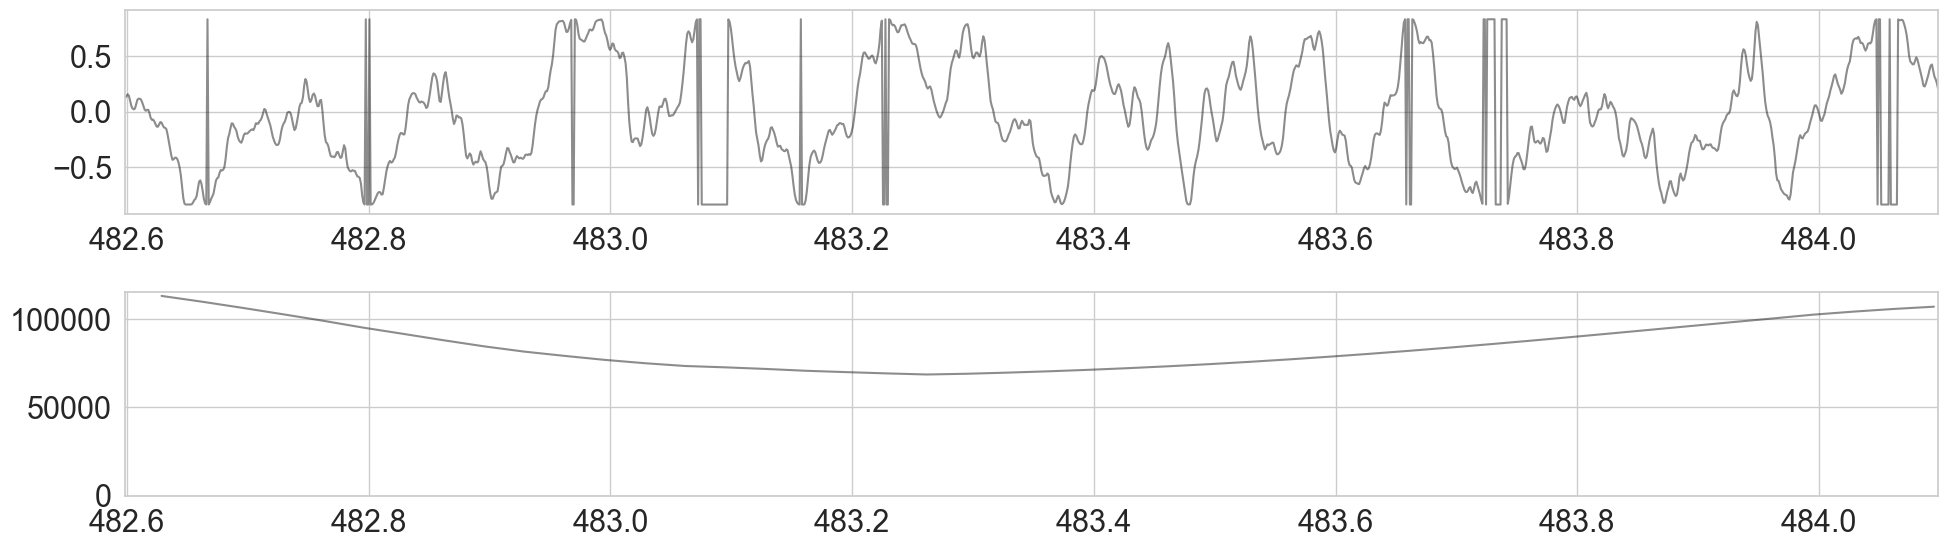

In [82]:
fig,ax = plt.subplots(2,1,figsize=(20,6))

ax[0].plot(new_lfptime,new_lfp,color='k',alpha=0.5)

ax[1].plot(new_postime,new_vsm,color='k',alpha=0.5)
ax[1].set_ylim(0,)

for a in ax: 
    a.set_xlim(new_st,new_ed)

fig.tight_layout()
plt.show()


In [83]:
file

'LH03_D18_TETFP11_lfpvars_approach.csv'

The code below incorporates pauses for the user to make the window selection and evaluate the final output! **Updat: I thought this was working but the 'selected_indices' are not actually getting defined**

In [104]:
#iterate over the lfp files, and within the loop
#grab the relevant position file
file = 0
lfpfile = pd.read_csv(os.path.join(datapath,files_lfp[file]))

trial = 4 
odorblock = 1
subtrial = lfpfile[(lfpfile['trial_labels_lfplen']==trial) & (lfpfile['odor_block_labels_lfplen']==odorblock)]

lfp = subtrial['lfp_approach'].values
lfptime = subtrial['time'].values

#find the corresponding position file
posfilename = files_lfp[file].split('TET')[0] + 'posvars_approach.csv'
posfile = pd.read_csv(os.path.join(datapath,posfilename))

subtrialpos = posfile[(posfile['trial_labels_poslen']==trial) & (posfile['odor_block_labels_poslen']==odorblock)]
vsm = subtrialpos['vsm'].values
postime = subtrialpos['vposts'].values


s1 = ColumnDataSource(data=dict(x=lfptime, y=lfp))
s2 = ColumnDataSource(data=dict(x=postime, y=vsm))


p1 = figure(plot_width=900, plot_height=200,tools=['box_select', 'pan', 'lasso_select','zoom_out','box_zoom', 'reset'])
p2 = figure(plot_width=900, plot_height=200,tools=['box_select', 'pan', 'lasso_select','zoom_out','box_zoom', 'reset'])


#the callback code only works with circle/scatter glyphs 
#for some reason, but it's hard to just see the lfp in 
#scatter format, so I've combined both the line plot for
#user visibility and the scatter/circle glyphs for selection
p1.line("x", "y", source=s1, alpha=0.6)
p1.circle("x", "y", source=s1, fill_color='white', size=4) 


p2.line("x", "y", source=s2, alpha=0.6)


# make a custom javascript callback that exports the indices of the selected points to the Jupyter notebook
callback = CustomJS(args=dict(s=s1), 
                    code="""
                         console.log('Running CustomJS callback now.');
                         var indices = s.selected.indices;
                         var kernel = IPython.notebook.kernel;
                         kernel.execute("selected_indices = " + indices)
                         """)

# set the callback to run when a selection geometry event occurs in the figure
p1.js_on_event('selectiongeometry', callback)


# Link the x range between the two subplots
p1.x_range = p2.x_range

layout = gridplot([[p1], [p2]])

show(layout)


input("Press any key to continue")


# inspect the selected indices
selected_indices

# use the indices to create lists of the selected values
x_selected, y_selected = [], []
for indice in selected_indices:
    x_val = s1.data['x'][indice]
    y_val = s1.data['y'][indice]
    x_selected.append(x_val)
    y_selected.append(y_val)
    
# make a column data souce containing the selected values
selected = ColumnDataSource(data=dict(x=x_selected, y=y_selected))

# inspect the selected data
# selected.data

new_st = selected.data['x'][0]
new_ed = selected.data['x'][-1]

print(new_st,new_ed)

window_dur = selected.data['x'][-1]-selected.data['x'][0]
print('window dur: ',window_dur)

target_winsize = 1.5
while window_dur > target_winsize: 
    
    #trim the window down to size
    excess = window_dur - target_winsize
    trim = excess/2
    
    new_st = new_st+trim
    new_ed = new_ed-trim
    
    window_dur = new_ed - new_st
    
    print(window_dur, new_ed, new_st)
    
new_lfp = lfp[(lfptime>=new_st) & (lfptime<=new_ed)]
new_lfptime = lfptime[(lfptime>=new_st) & (lfptime<=new_ed)]
new_vsm = vsm[(postime>=new_st) & (postime<=new_ed)]
new_postime = postime[(postime>=new_st) & (postime<=new_ed)]

fig,ax = plt.subplots(2,1,figsize=(20,6))

ax[0].plot(new_lfptime,new_lfp,color='k',alpha=0.5)

ax[1].plot(new_postime,new_vsm,color='k',alpha=0.5)
ax[1].set_ylim(0,)

for a in ax: 
    a.set_xlim(new_st,new_ed)

fig.tight_layout()

input("Press any key to continue")


KeyboardInterrupt: Interrupted by user

In [103]:
selected_indices


[]

The code below works, but I need to incorporate it into a for loop to make the LFP window selection tractable. Current problem is that the extraction of the indices appears to require being run in a cell that follows (and is not integrated within) the code block that runs the figure.  

In [105]:
#iterate over the lfp files, and within the loop
#grab the relevant position file
file = 0
lfpfile = pd.read_csv(os.path.join(datapath,files_lfp[file]))

trial = 2 
odorblock = 1
subtrial = lfpfile[(lfpfile['trial_labels_lfplen']==trial) & (lfpfile['odor_block_labels_lfplen']==odorblock)]

lfp = subtrial['lfp_approach'].values
lfptime = subtrial['time'].values

#find the corresponding position file
posfilename = files_lfp[file].split('TET')[0] + 'posvars_approach.csv'
posfile = pd.read_csv(os.path.join(datapath,posfilename))

subtrialpos = posfile[(posfile['trial_labels_poslen']==trial) & (posfile['odor_block_labels_poslen']==odorblock)]
vsm = subtrialpos['vsm'].values
postime = subtrialpos['vposts'].values

In [106]:
s1 = ColumnDataSource(data=dict(x=lfptime, y=lfp))
s2 = ColumnDataSource(data=dict(x=postime, y=vsm))


p1 = figure(plot_width=900, plot_height=200,tools=['box_select', 'pan', 'lasso_select','zoom_out','box_zoom', 'reset'])
p2 = figure(plot_width=900, plot_height=200,tools=['box_select', 'pan', 'lasso_select','zoom_out','box_zoom', 'reset'])


#the callback code only works with circle/scatter glyphs 
#for some reason, but it's hard to just see the lfp in 
#scatter format, so I've combined both the line plot for
#user visibility and the scatter/circle glyphs for selection
p1.line("x", "y", source=s1, alpha=0.6)
p1.circle("x", "y", source=s1, fill_color='white', size=4) 


p2.line("x", "y", source=s2, alpha=0.6)


# make a custom javascript callback that exports the indices of the selected points to the Jupyter notebook
callback = CustomJS(args=dict(s=s1), 
                    code="""
                         console.log('Running CustomJS callback now.');
                         var indices = s.selected.indices;
                         var kernel = IPython.notebook.kernel;
                         kernel.execute("selected_indices = " + indices)
                         """)

# set the callback to run when a selection geometry event occurs in the figure
p1.js_on_event('selectiongeometry', callback)


# Link the x range between the two subplots
p1.x_range = p2.x_range

layout = gridplot([[p1], [p2]])

show(layout)

In [107]:
# inspect the selected indices
selected_indices

# use the indices to create lists of the selected values
x_selected, y_selected = [], []
for indice in selected_indices:
    x_val = s1.data['x'][indice]
    y_val = s1.data['y'][indice]
    x_selected.append(x_val)
    y_selected.append(y_val)
    
# make a column data souce containing the selected values
selected = ColumnDataSource(data=dict(x=x_selected, y=y_selected))

# inspect the selected data
# selected.data

new_st = selected.data['x'][0]
new_ed = selected.data['x'][-1]

print(new_st,new_ed)

window_dur = selected.data['x'][-1]-selected.data['x'][0]
print('window dur: ',window_dur)

584.591525 587.953525
window dur:  3.3619999999999663


In [108]:
target_winsize = 1.5
while window_dur > target_winsize: 
    
    #trim the window down to size
    excess = window_dur - target_winsize
    trim = excess/2
    
    new_st = new_st+trim
    new_ed = new_ed-trim
    
    window_dur = new_ed - new_st
    
    print(window_dur, new_ed, new_st)
    


1.5 587.0225250000001 585.5225250000001


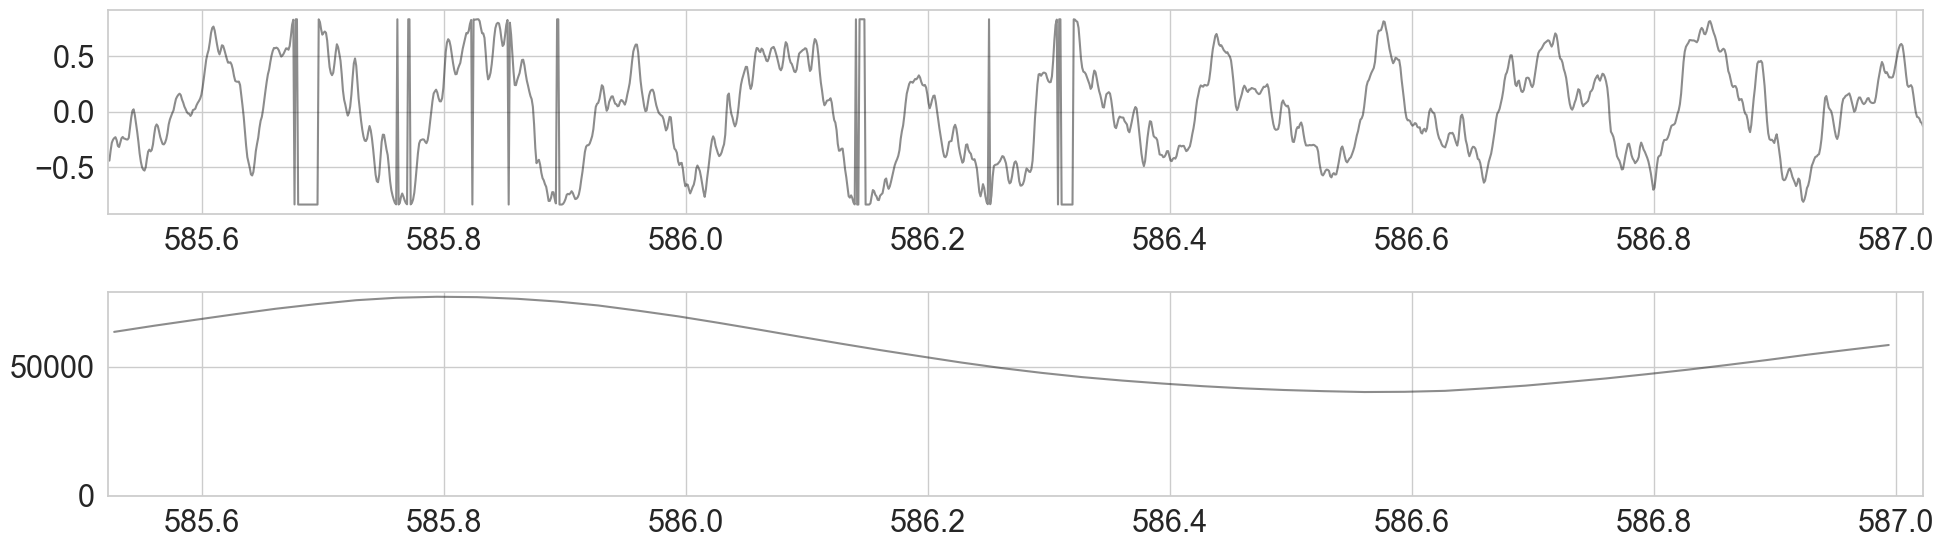

In [109]:
new_lfp = lfp[(lfptime>=new_st) & (lfptime<=new_ed)]
new_lfptime = lfptime[(lfptime>=new_st) & (lfptime<=new_ed)]
new_vsm = vsm[(postime>=new_st) & (postime<=new_ed)]
new_postime = postime[(postime>=new_st) & (postime<=new_ed)]

fig,ax = plt.subplots(2,1,figsize=(20,6))

ax[0].plot(new_lfptime,new_lfp,color='k',alpha=0.5)

ax[1].plot(new_postime,new_vsm,color='k',alpha=0.5)
ax[1].set_ylim(0,)

for a in ax: 
    a.set_xlim(new_st,new_ed)

fig.tight_layout()